In [1]:
from sklearn import preprocessing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min

%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

df_train = pd.read_csv('./data/train.csv')
df_aux_train = df_train

df_test = pd.read_csv('./data/test.csv')
df_aux_test = df_train

In [2]:
# Normalizacion

def _normalizacion(df, columnas):
    x = df.values #returns a numpy array
    min_max_scaler = preprocessing.MinMaxScaler()
    x_scaled = min_max_scaler.fit_transform(x)
    df = pd.DataFrame(x_scaled)
    df.columns = columnas
    return df

In [3]:
def generar_grafico(df_completo, columnas, df_y=[]):
    """ df_completo: El df a calcular kmeans
        columnas: Es con que columnas se va a calcular
        df_y es la columna precio (es una serie)"""
    """Muestra el grafico de variacion entre 0 y 20 clusters(k)"""
    """Retorna X e y, para usar en el entrenamiento y la clasificacion"""
    df = df_completo[columnas].copy()
    for columna in columnas:
        df[columna] = df[columna].fillna(df[columna].mean())
    df = _normalizacion(df, columnas)
    
    X = np.array(df[columnas])
    y = None if type(df_y) == list else np.array(df_y)
    
    Nc = range(1, 20)
    kmeans = [KMeans(n_clusters=i) for i in Nc]
    score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]

    plt.figure(figsize=(15,15))
    plt.plot(Nc,score)
    plt.xlabel('Number of Clusters')
    plt.ylabel('Score')
    plt.title('Elbow Curve')
    plt.show()
    
    return df, X, y

In [4]:
def etiquetado(k_cluster, X):
    # k Max es el largo de este arreglo
    colores=['red','green','blue','cyan','yellow', 'black', 'brown', 'orange', 'pink', 'purple', 'beige']
    kmeans = KMeans(n_clusters=k_cluster).fit(X)
    colores = colores[:k_cluster]
    # Clasificacion
    labels = kmeans.predict(X)
    C = kmeans.cluster_centers_ # Centroides
    asignar = []
    for row in labels:
        asignar.append(colores[row])
    # Grafico de todos los puntos clasificados:    
    fig = plt.figure(figsize=(20,20))
    ax = Axes3D(fig)
    ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=asignar,s=60)
    ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker='*', c=colores, s=1000)
    return labels, asignar, X, C, colores

In [5]:
def proyeccion_2d(df, col1, col2, asignar, C, colores, fig_size=(20, 20)):
    f1 = df[col1].values
    f2 = df[col2].values

    plt.figure(figsize=fig_size)
    plt.scatter(f1, f2, c=asignar, s=70)
    plt.scatter(C[:, 0], C[:, 1], marker='*', c=colores, s=1000)
    plt.xlabel(col1)
    plt.ylabel(col2)
    plt.show()

In [6]:
def generar_csv_final(ids_series, labels, colores):
    final =  pd.DataFrame()
    # final['id'] = df_aux['id'].values
    final['id'] = ids_series.values
    final['label'] = labels;
    cantidadGrupo =  pd.DataFrame()
    cantidadGrupo['color'] = colores
    cantidadGrupo['cantidad'] = final.groupby('label').size()
    display(cantidadGrupo)
    return final

## Columnas Básicas

### Con el set de entrenamiento

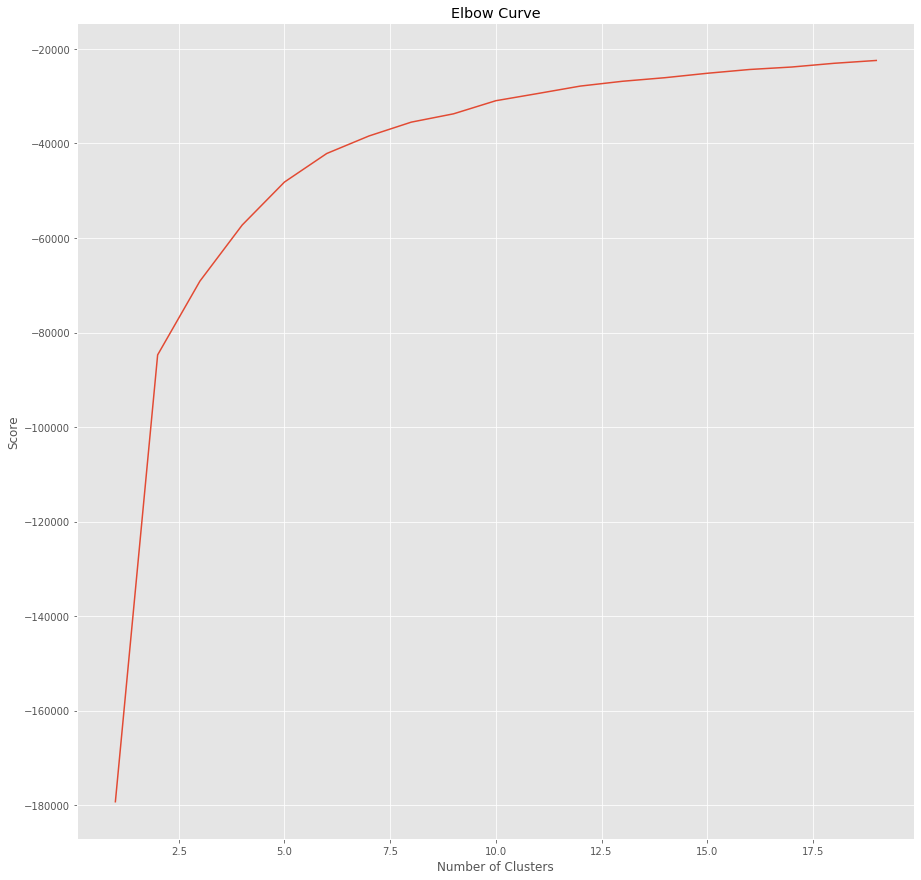

In [7]:
columnas_basicas = ['metroscubiertos', 'metrostotales', 'antiguedad', 'habitaciones', 'garages', 'banos',
            'lat', 'lng', 'escuelascercanas', 'centroscomercialescercanos']

df_precio = df_aux_train['precio']
df_train, X, Y = generar_grafico(df_aux_train, columnas_basicas, df_precio)

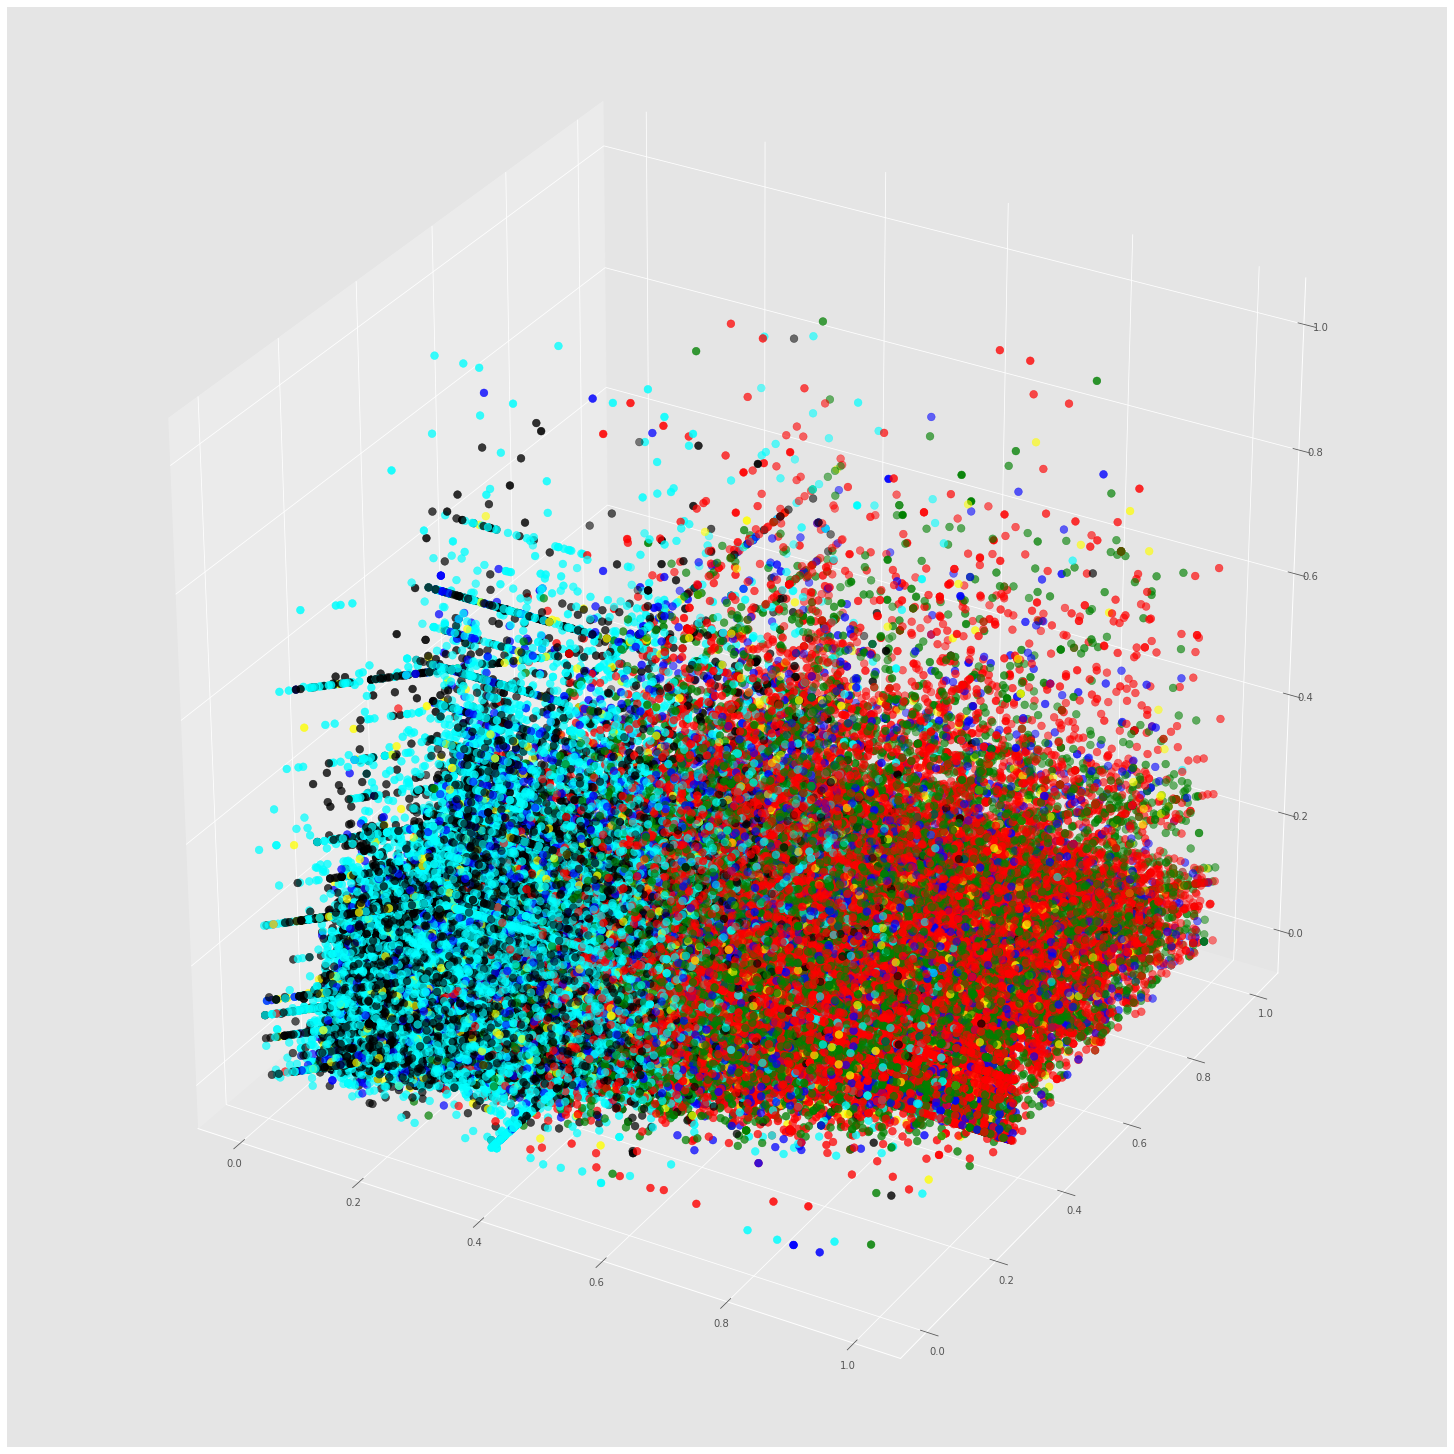

In [8]:
labels, asignar, X, C, colores = etiquetado(6, X)

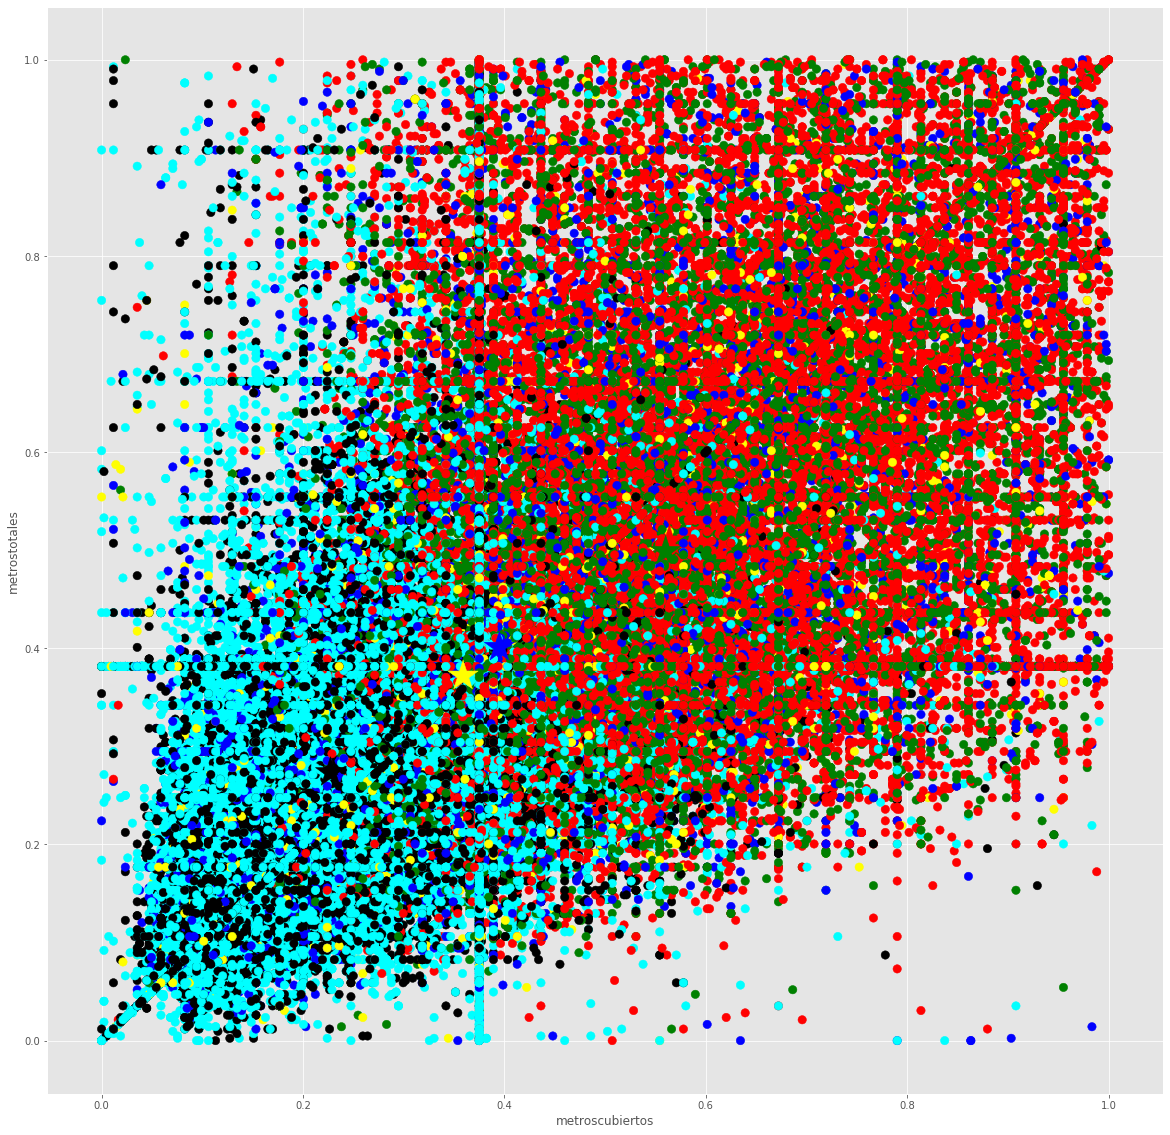

In [9]:
proyeccion_2d(df_train, 'metroscubiertos', 'metrostotales', asignar, C, colores)

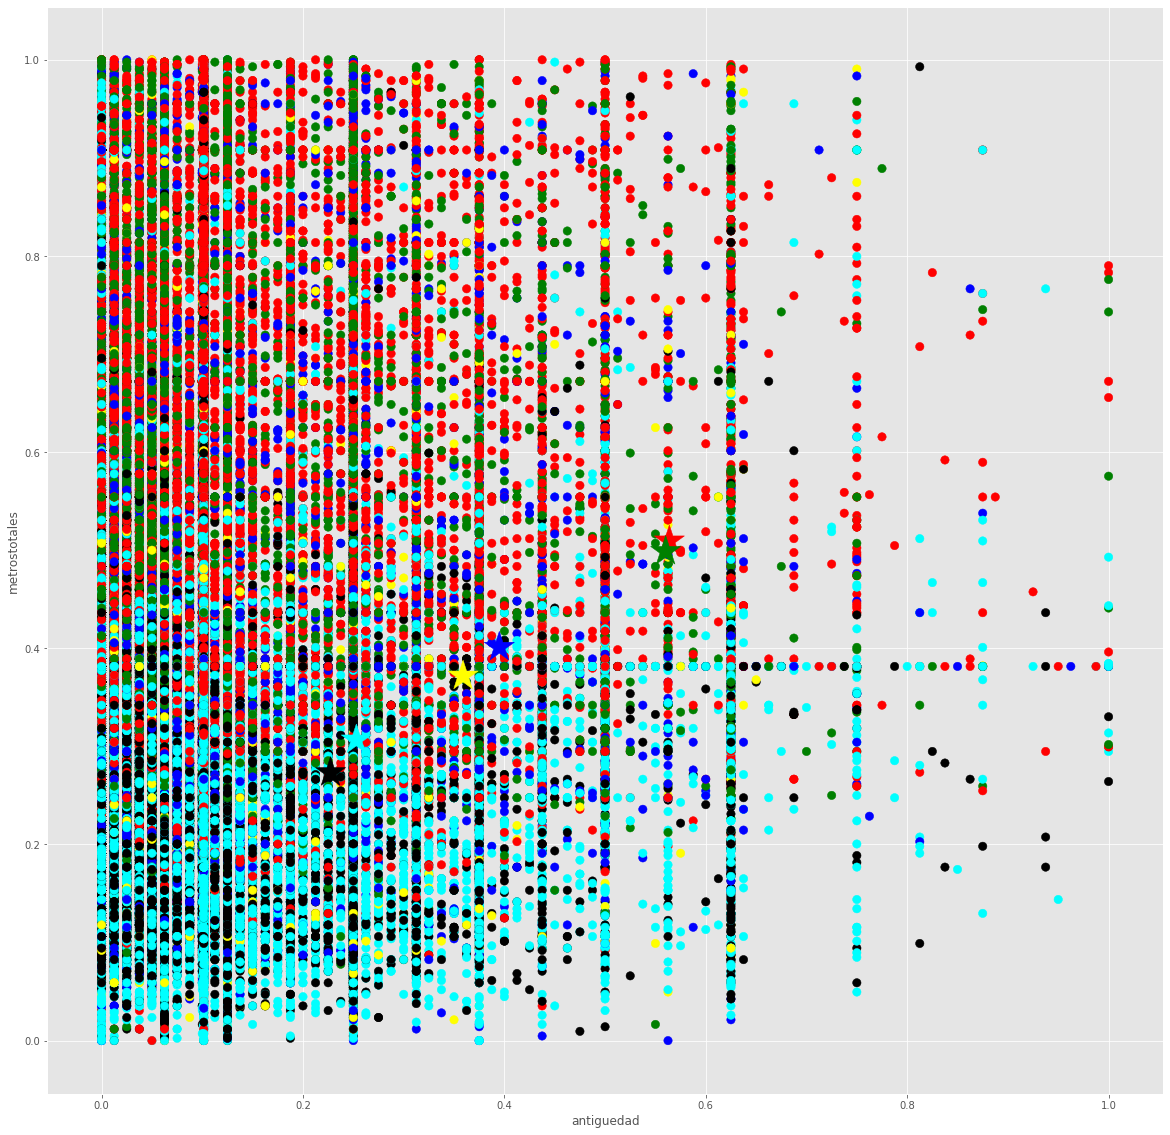

In [10]:
proyeccion_2d(df_train, 'antiguedad', 'metrostotales', asignar, C, colores)

In [11]:
ids_series = df_aux_train['id']
final_train_columnas_basicas = generar_csv_final(ids_series, labels, colores)
final_train_columnas_basicas

color  cantidad
0     red     52087
1   green     35757
2    blue     18679
3    cyan     74066
4  yellow      7253
5   black     52158

id  label
0       254099      3
1        53461      1
2       247984      3
3       209067      5
4       185997      3
...        ...    ...
239995  119879      3
239996  259178      1
239997  131932      3
239998  146867      1
239999  121958      3

[240000 rows x 2 columns]

### Con el set de testeo

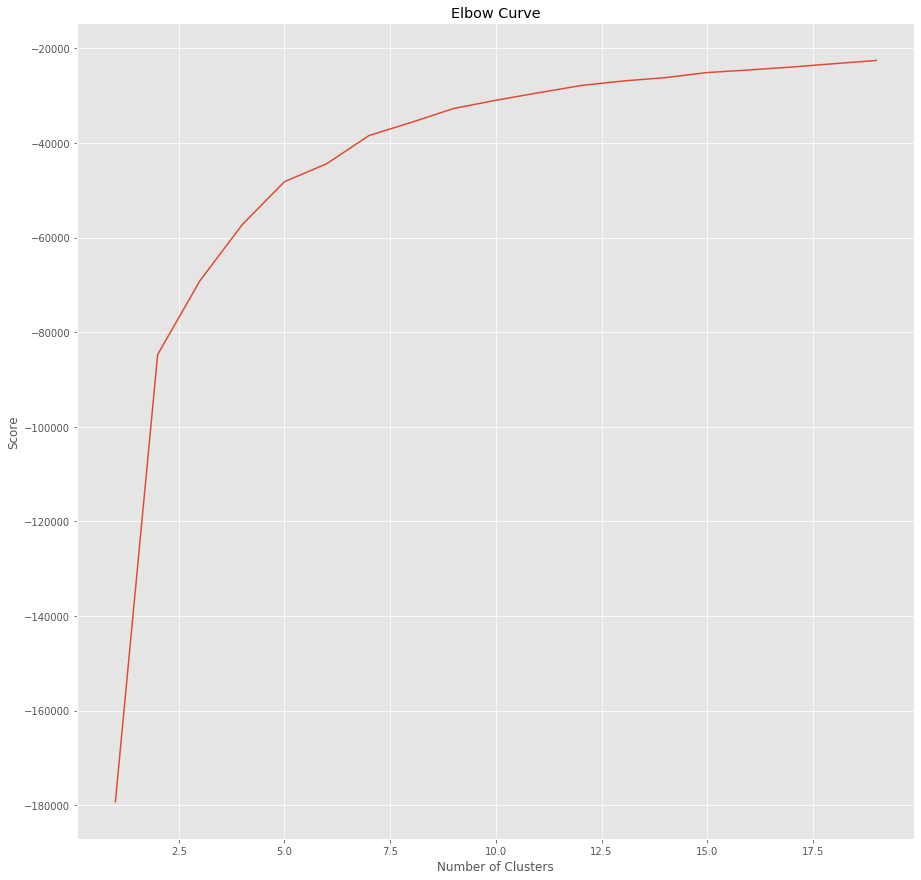

In [12]:
df_test, X, Y = generar_grafico(df_aux_test, columnas_basicas)

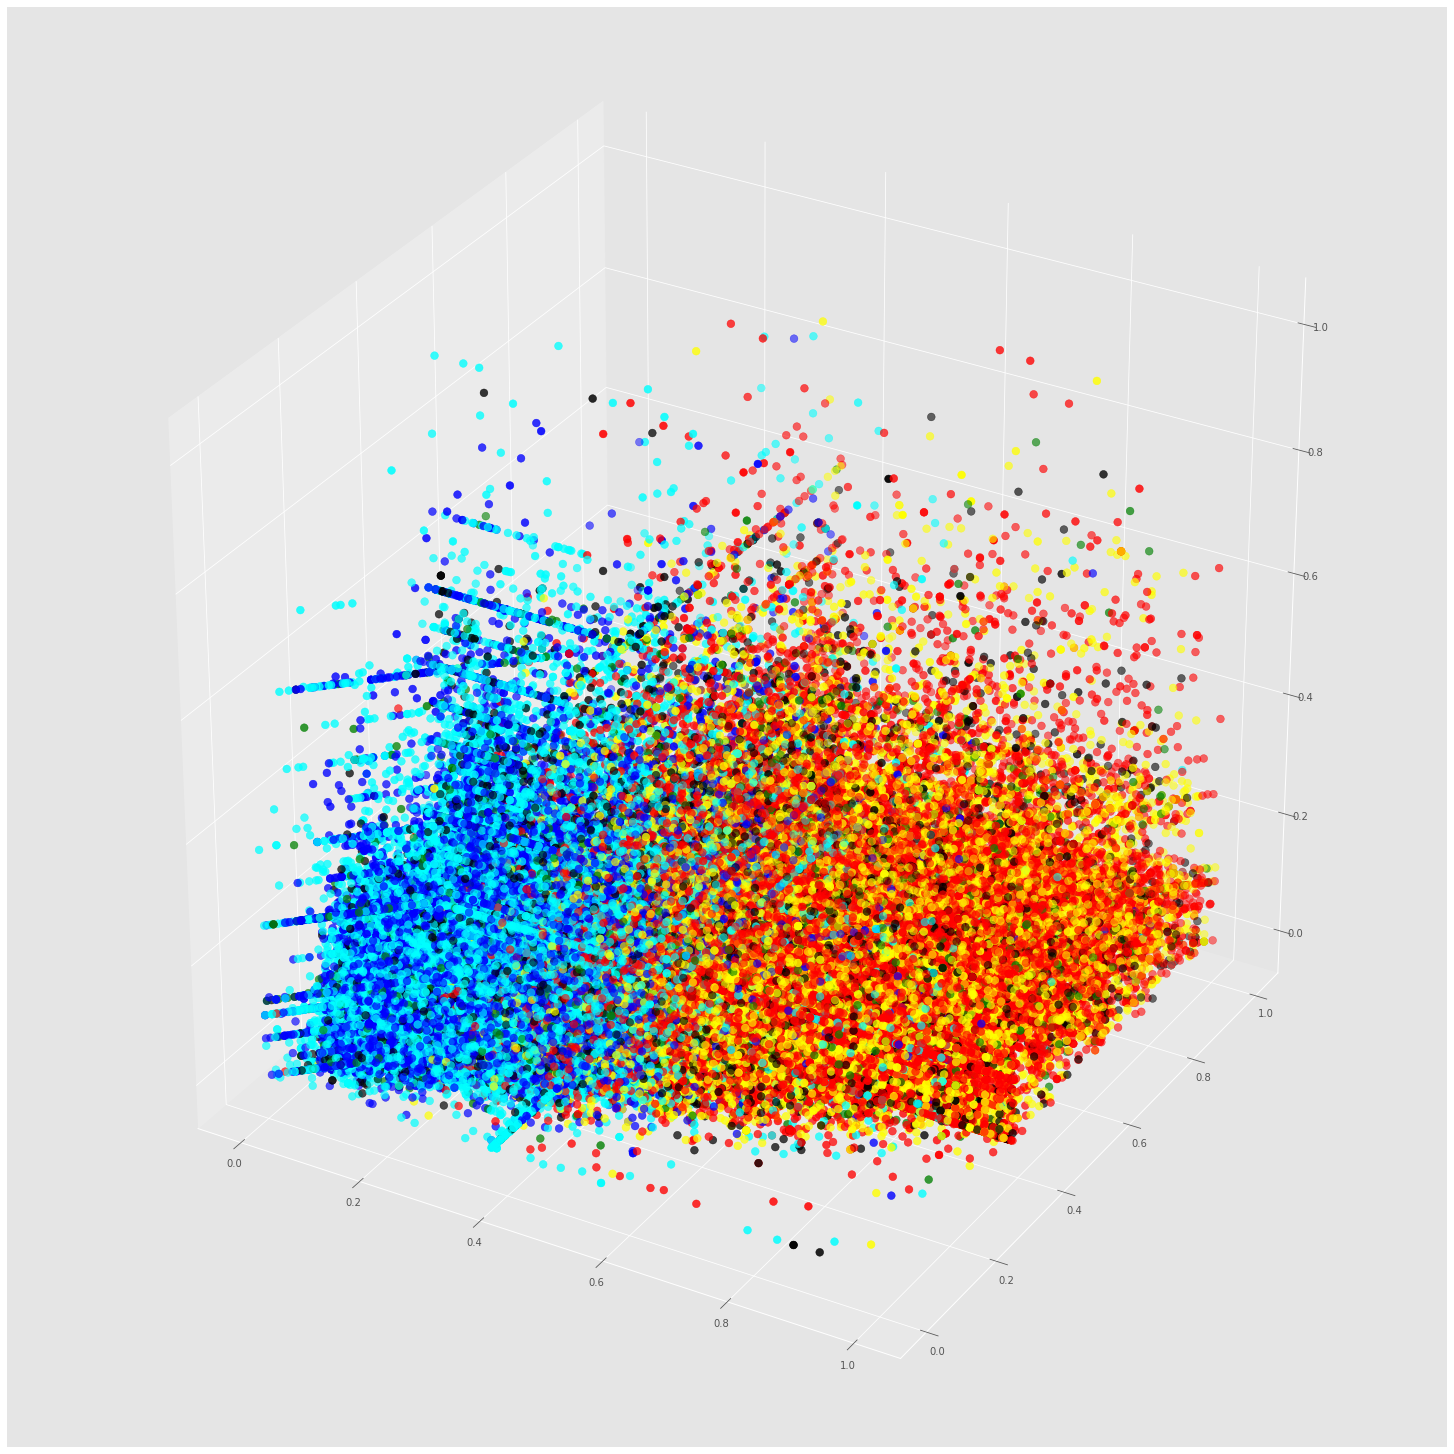

In [13]:
labels, asignar, X, C, colores = etiquetado(6, X)

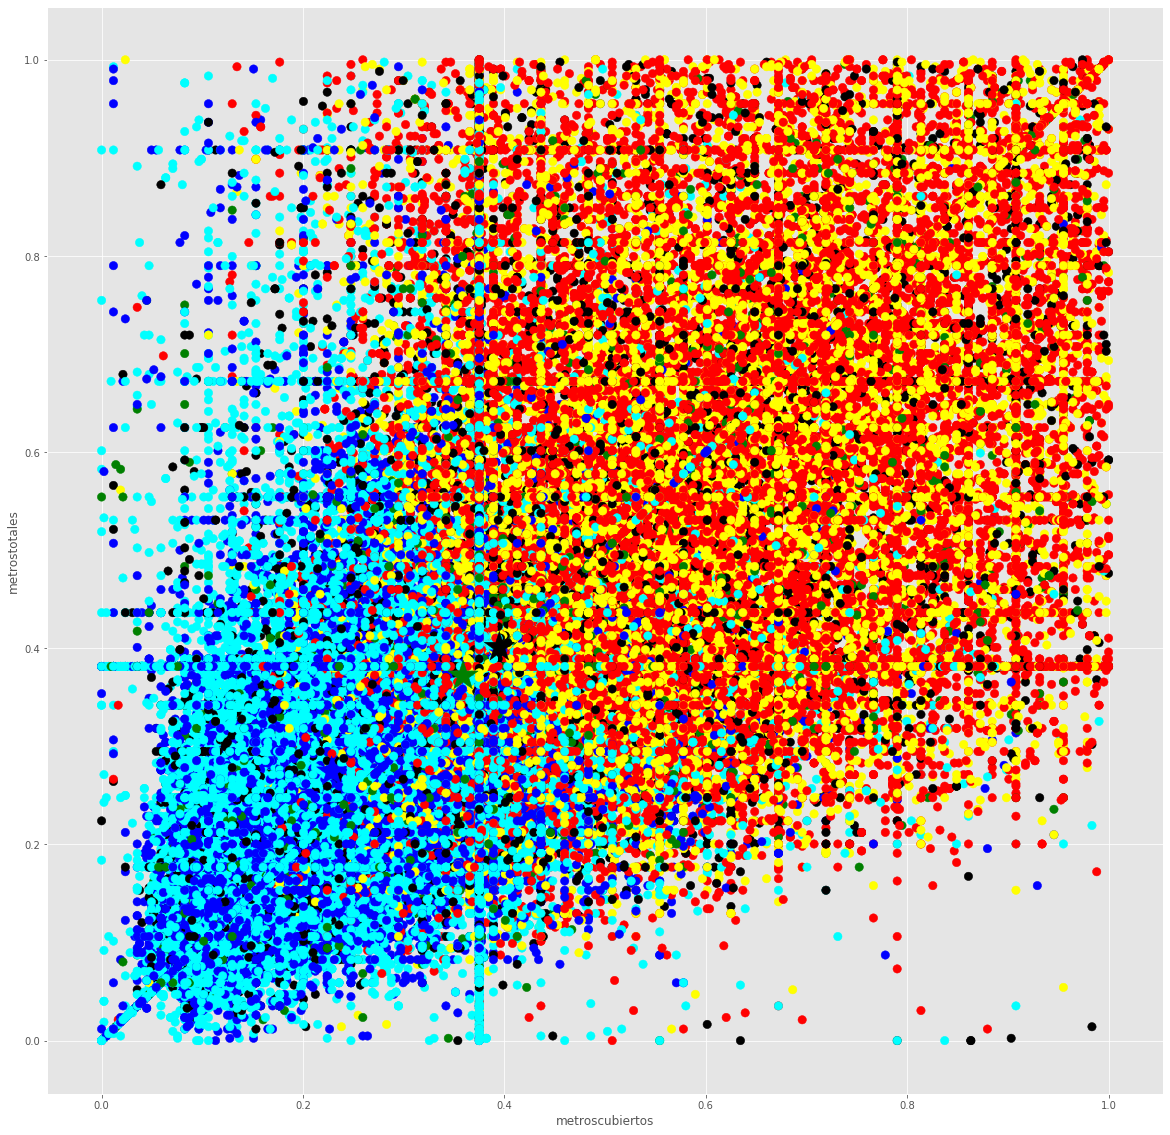

In [14]:
proyeccion_2d(df_test, 'metroscubiertos', 'metrostotales', asignar, C, colores)

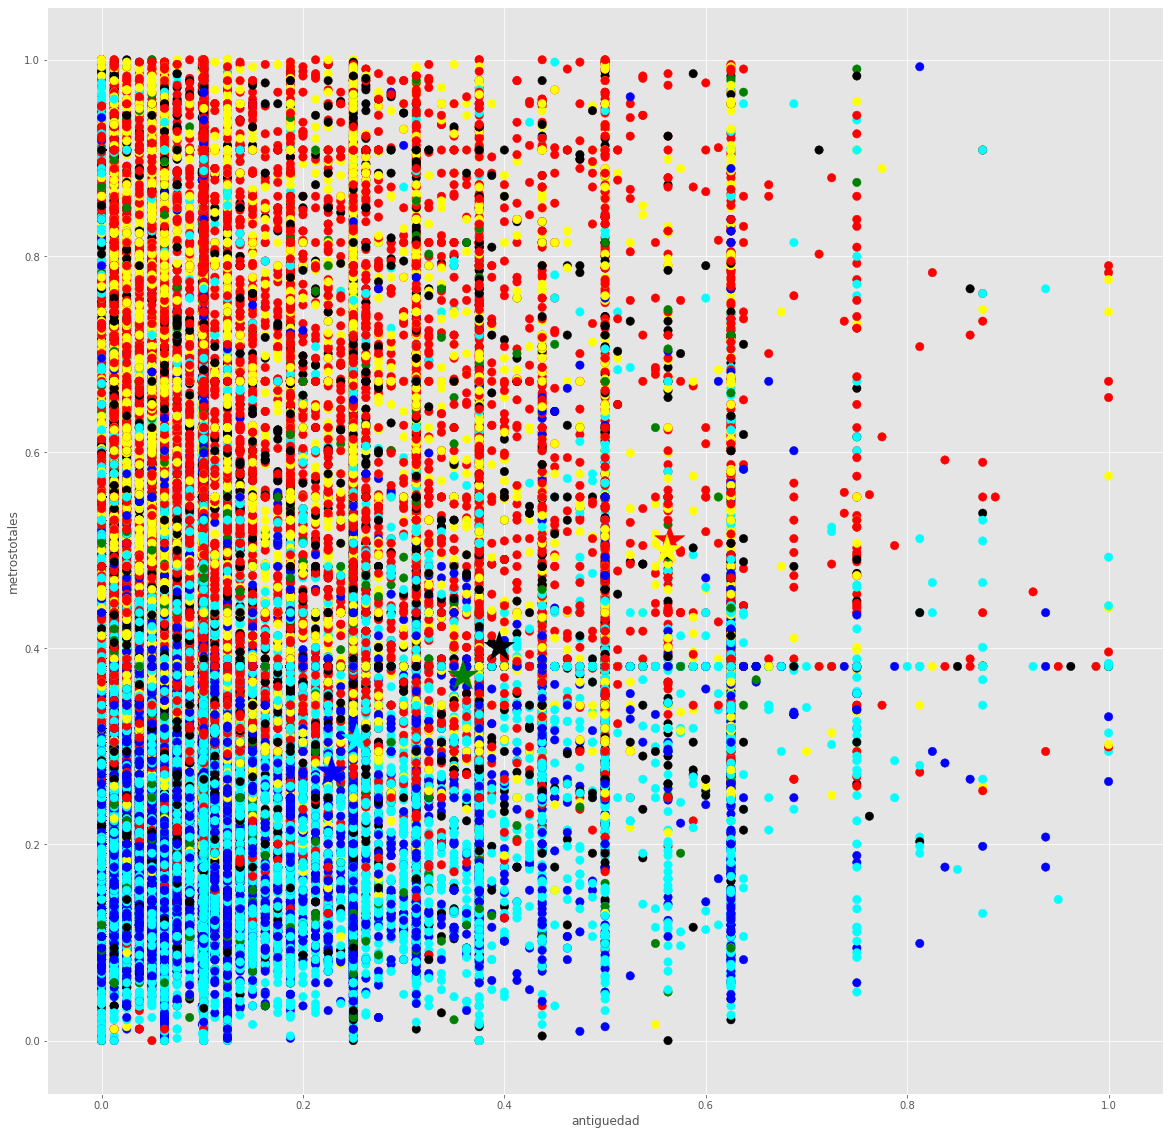

In [15]:
proyeccion_2d(df_test, 'antiguedad', 'metrostotales', asignar, C, colores)

In [16]:
ids_series = df_aux_test['id']
final_train_columnas_basicas = generar_csv_final(ids_series, labels, colores)
final_train_columnas_basicas

color  cantidad
0     red     51975
1   green      7253
2    blue     52380
3    cyan     74178
4  yellow     35535
5   black     18679

id  label
0       254099      3
1        53461      4
2       247984      3
3       209067      2
4       185997      3
...        ...    ...
239995  119879      3
239996  259178      4
239997  131932      3
239998  146867      4
239999  121958      3

[240000 rows x 2 columns]